In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
from importlib import reload
import time_series_module as tsm
import time_series_cross_valid as tscv
import time_series_versioning as tsver
from functools import reduce

In [3]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge

In [4]:
from sklearn.metrics import mean_squared_error as MSE

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])
date_time = df['date_time'].copy()

In [7]:
f_dict = {}

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
date_time_features = tsm.get_date_time_features(df, 'date_time', month = True, season = True, year = True)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
targets = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']

In [12]:
def get_feature_list(df):
    return [f for f in list(df.columns) if f not in targets and f != 'date_time']

In [14]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose as SDE

In [15]:
#df = tsm.feature_extractor(f_dict, df, lagged = [['deg_C', 'relative_humidity', 'absolute_humidity',
#                                    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5'] + targets, 24],
#                               RWF = [targets, 24, np.std])

df.dropna(axis = 0, inplace = True)
date_time = date_time[list(df.index)]
date_time.index, df.index = list(range(len(df))), list(range(len(df)))

In [16]:
#df = tsm.feature_extractor(f_dict, df, STL = [date_time,
#                                         ['lag_target_carbon_monoxide_24', 'lag_target_benzene_24',
#                                          'lag_target_nitrogen_oxides_24'],
#                                         True, False, 'additive'])

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
f_dict

{}

In [19]:
#df['idx'] = pd.DataFrame(data = list(range(len(df))), index = list(range(len(df))))

In [20]:
features = get_feature_list(df)

In [21]:
reload(tsm)

<module 'time_series_module' from '/home/alexey/notebooks/EPAM/practice_1/time_series_module.py'>

In [22]:
def mape(Y, Y_hat):
    return 100 * np.abs(Y - Y_hat) / Y

In [23]:
ridge = Ridge(alpha = .001, normalize = True)
linreg = LinReg(normalize = True)

In [24]:
len(df)

7111

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
rcParams['figure.figsize'] = 20, 8
#cv = tscv.CrossValid(train_size = 2000, test_size = 740, min_period = 0)

In [27]:
reload(tsm)

<module 'time_series_module' from '/home/alexey/notebooks/EPAM/practice_1/time_series_module.py'>

In [28]:
df

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,...,m_9,m_10,m_11,m_12,s_1,s_2,s_3,s_4,y_2010,y_2011
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,...,0,0,0,0,0,1,0,0,1,0
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,...,0,0,0,0,0,1,0,0,1,0
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,...,0,0,0,0,0,1,0,0,1,0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,...,0,0,0,0,0,1,0,0,1,0
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,...,0,0,0,1,1,0,0,0,1,0
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,...,0,0,0,1,1,0,0,0,1,0
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,...,0,0,0,1,1,0,0,0,1,0
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,...,0,0,0,1,1,0,0,0,1,0


In [29]:
def cross_valid(forecast_model, horizon, cv_dict, model, metrics = MSE):
    data, features, target = forecast_model.data, forecast_model.features, forecast_model.targets
    cv = cv_dict['cv']
    cv_split = list(cv.split(len(data), cv_dict['step'], cv_dict['gap']))
    
    results = {'mean_Y' : np.zeros((cv.train_size,1)),
               'mean_Y_pred' : np.zeros((cv.test_size, 1)), 
               'train_loss' : 0, 'test_loss' : 0, 'train_horizons' : [], 'test_horizons' : [],
               'mean_Y_train_pred' : np.zeros((cv.train_size, 1)), 'mean_Y_test' :np.zeros((cv.test_size, 1))}

    for train, test in cv_split:
        X_train, Y_train, X_test, Y_test = tsm.get_cv_matrices(data.loc[train], data.loc[test], features, target)
        fitted_model = model.fit(X_train, Y_train)
        Y_train_pred = np.reshape(fitted_model.predict(X_train), (len(X_train), 1))
        Y_pred = np.reshape(fitted_model.predict(X_test), (len(X_test), 1))
        results['train_loss'] += mape(Y_train, Y_train_pred)
        results['test_loss'] += mape(Y_test, Y_pred)
        results['mean_Y'] += Y_train
        results['mean_Y_train_pred'] += Y_train_pred
        results['mean_Y_test'] += Y_test
        results['mean_Y_pred'] += Y_pred
    results['train_loss'] /= cv.n_splits
    results['test_loss'] /= cv.n_splits
    results['mean_Y'] /= cv.n_splits
    results['mean_Y_pred'] /= cv.n_splits
    results['cv_dict'] = cv_dict
    return results

In [30]:
quality = {}
horizons = 20
for tar in targets:
    quality[tar] = {'train_loss' : [], 'test_loss' : [], 'mean_Y' : [], 'mean_Y_pred' : [], 
              'mean_Y_train_pred' : [], 'mean_Y_test' : []}
for hor in range(1,horizons + 1):
    for tar in  targets:
        forecast_model = tsm.ForecastModel(df[date_time_features], df, features + targets, [tar], prior_lag = list(range(hor, horizons + 1)), post_lag = -hor)
        forecast_model.forecast_prep(new_index = True)
        train_size = 2000 - horizons
        cv = tscv.CrossValid(train_size = train_size, test_size = 1, min_period = 0)
        cv_dict = {'cv' : cv, 'step' : 100, 'gap' : hor - 1}
        results = cross_valid(forecast_model, hor, cv_dict, ridge, mape)
        quality[tar]['train_loss'].append(results['train_loss'])
        quality[tar]['test_loss'].append(results['test_loss'])
        quality[tar]['mean_Y'].append(results['mean_Y'])
        quality[tar]['mean_Y_pred'].append(results['mean_Y_pred'])
        quality[tar]['mean_Y_train_pred'].append(results['mean_Y_train_pred'])
        quality[tar]['mean_Y_test'].append(results['mean_Y_test'])
        quality[tar]['cv_dict'] = cv_dict

/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_' + c + '_' + str(l)] = lagged(data, c, l)
/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_' + c + '_' + str(l)] = lagged(data, c, l)
/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented fra

/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_' + c + '_' + str(l)] = lagged(data, c, l)
/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_' + c + '_' + str(l)] = lagged(data, c, l)
/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented fra

/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_' + c + '_' + str(l)] = lagged(data, c, l)
/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_' + c + '_' + str(l)] = lagged(data, c, l)
/home/alexey/notebooks/EPAM/practice_1/time_series_module.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented fra

In [32]:
def plt_cv(quality, horizons):
    for key in quality.keys():
        print(key)
        cv = results['cv_dict']['cv']
        train_index = list(range(cv.train_size))
        test_index = list(range(cv.train_size,cv.train_size + horizons))
        plt.plot(train_index,reduce(lambda a, b: a + b, quality[key]['mean_Y'])/horizons, label = 'mean_Y')
        plt.plot(train_index,reduce(lambda a, b: a + b, quality[key]['mean_Y_train_pred'])/horizons, alpha = .5, label = 'mean_Y_train_pred')
        plt.plot(test_index, np.reshape(quality[key]['mean_Y_test'], (horizons,1)),color = 'r', label = 'mean_Y_test')
        plt.plot(test_index, np.reshape(quality[key]['mean_Y_pred'],(horizons,1)), alpha = .5, label = 'mean_Y_pred')
        plt.legend()
        plt.show()

target_carbon_monoxide


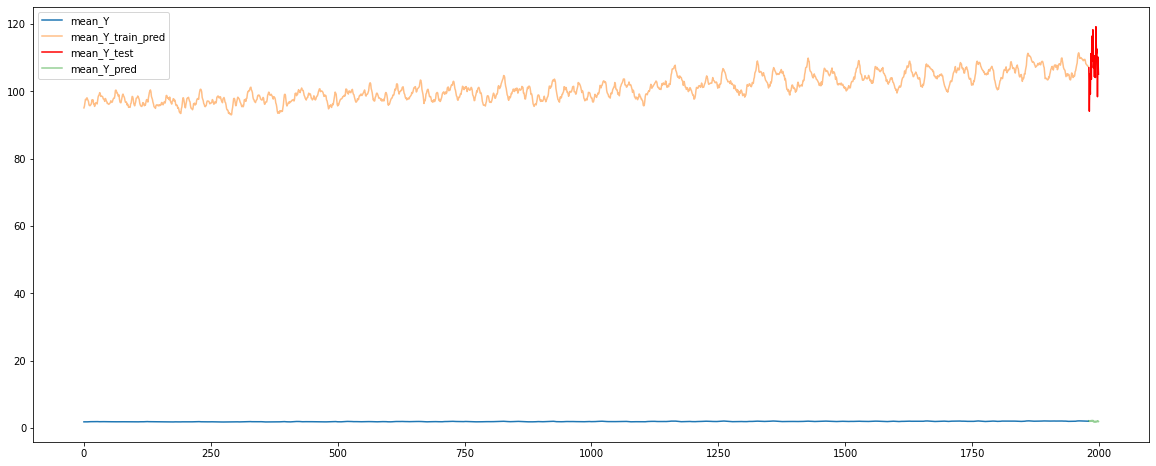

target_benzene


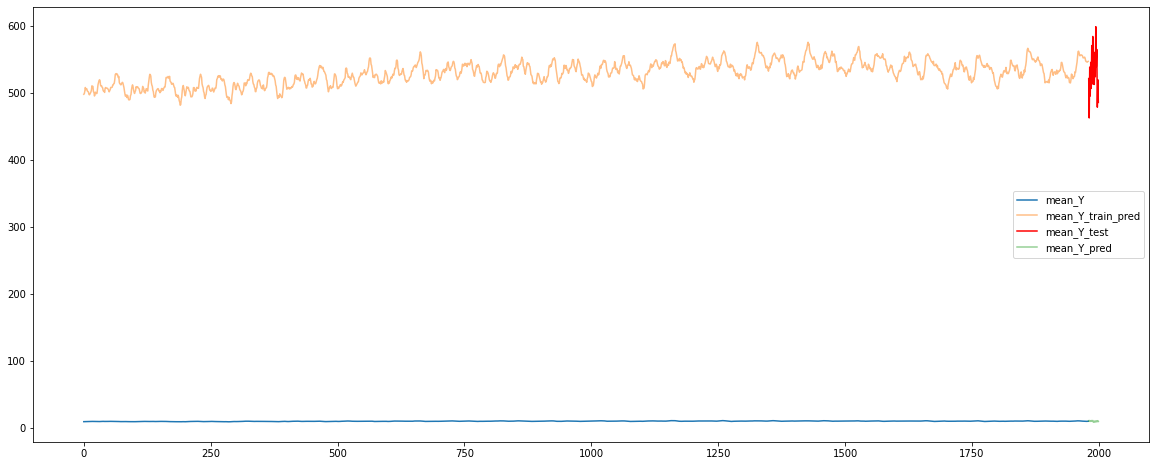

target_nitrogen_oxides


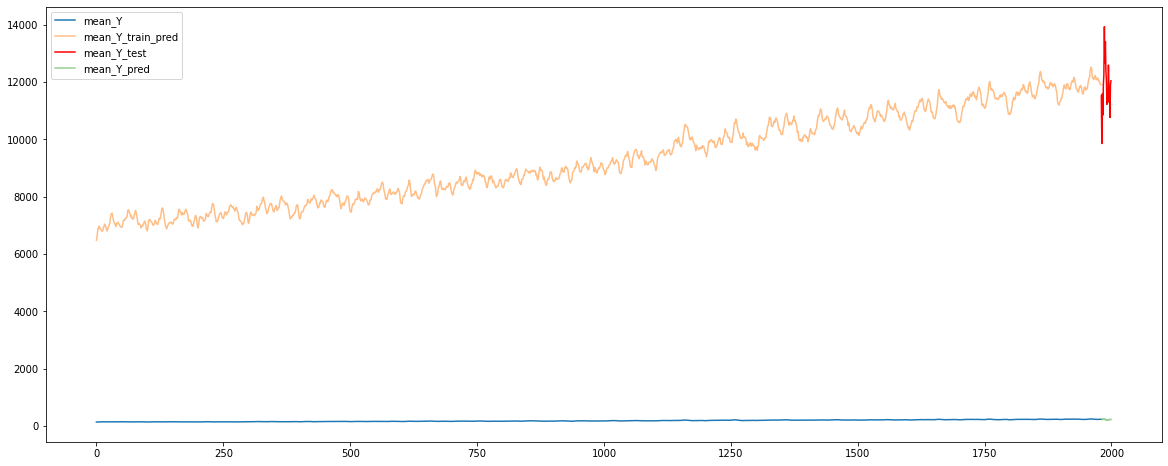

In [33]:
plt_cv(quality,horizons)